In [206]:
# importing all the important
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [207]:
# Import dataset
housingData = pd.read_csv('train.csv', encoding = 'utf-8')
housingData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [208]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [209]:
housingData.shape

(1460, 81)

In [210]:
housingData.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [211]:
##checking for nulls
housingData.select_dtypes(include='object').isnull().sum()[housingData.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [212]:
# function to return the percentage of null values in each column and sort the result in ascending order
def calculateNullPercentage(dataset):
  dataset.columns[dataset.isnull().any()]
  nulls = dataset.isnull().sum()/len(dataset)*100
  nulls = nulls[nulls>0]
  nulls.sort_values(inplace=True, ascending=False)
  return nulls

In [213]:
calculateNullPercentage(housingData)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [214]:
# Replace nulls with None in the catagorical variable columns found with nulls : 
columnList = ["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu","GarageType",
            "GarageFinish","GarageQual","GarageCond","BsmtFinType2","BsmtExposure",
            "BsmtFinType1","BsmtCond","BsmtQual"]
for i in columnList:
    housingData[i]=housingData[i].fillna('None')

In [215]:
calculateNullPercentage(housingData)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [216]:
# details of the columns with numeric data
housingData[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
90%      96.000000  2006.000000   335.000000
95%     107.000000  2007.000000   456.000000
99%     141.000000  2009.000000   791.920000
max     313.000000  2010.000000  1600.000000

In [217]:
# from data dictionary we know "LotFrontage" is described as Linear feet of street connected to property.  
housingData['LotFrontage'] = housingData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# for other columns with numeric, as there is a fair distribution, we can update the null values with median
housingData["GarageYrBlt"].fillna(housingData["GarageYrBlt"].median(), inplace=True)
housingData["MasVnrArea"].fillna(housingData["MasVnrArea"].median(), inplace=True)

In [218]:
# removing rows where Electrical is null
housingData["Electrical"].dropna(inplace=True)

In [219]:
# drop ID Column
housingData = housingData.drop(['Id'], axis=1)

In [220]:
# checking details of the columns with numeric data after updation
housingData[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

LotFrontage  GarageYrBlt   MasVnrArea
count  1460.000000  1460.000000  1460.000000
mean     70.199658  1978.589041   103.117123
std      22.431902    23.997022   180.731373
min      21.000000  1900.000000     0.000000
25%      60.000000  1962.000000     0.000000
50%      70.000000  1980.000000     0.000000
75%      80.000000  2001.000000   164.250000
90%      92.000000  2006.000000   335.000000
95%     104.000000  2007.000000   456.000000
99%     137.410000  2009.000000   791.280000
max     313.000000  2010.000000  1600.000000

In [221]:
#checking shape after cleanup
housingData.shape

(1460, 80)

In [222]:
# find all numeric columns for bar plot
numericData = housingData.select_dtypes(include=['float64', 'int64'])
numericData.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

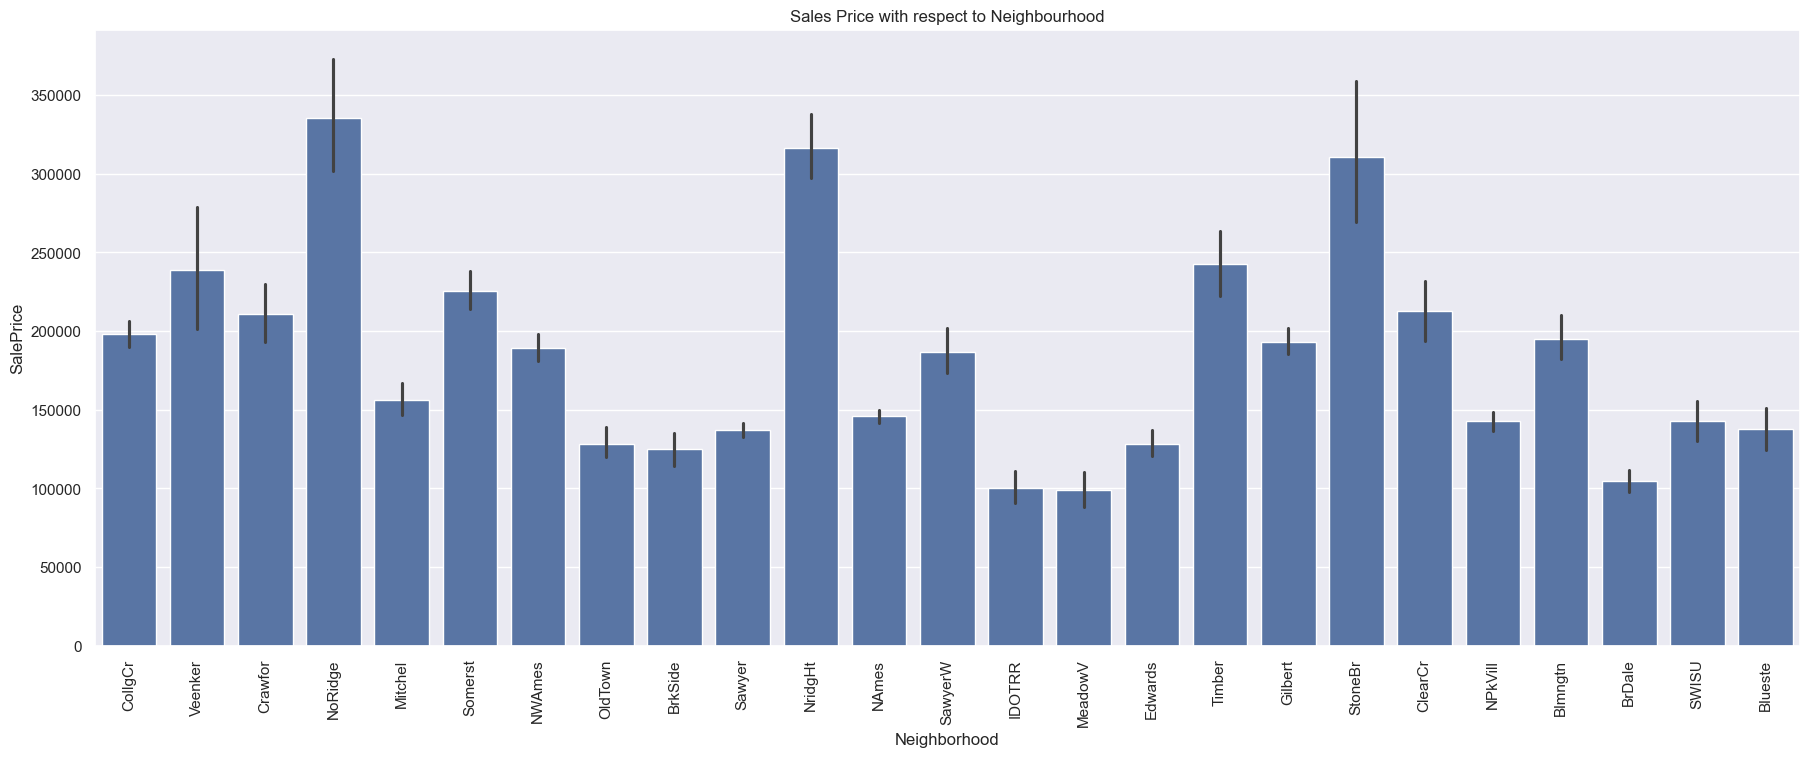

In [223]:
# bar plot for 'Sale Price' vs 'Neighborhood'

plt.figure(figsize=(22, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housingData)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

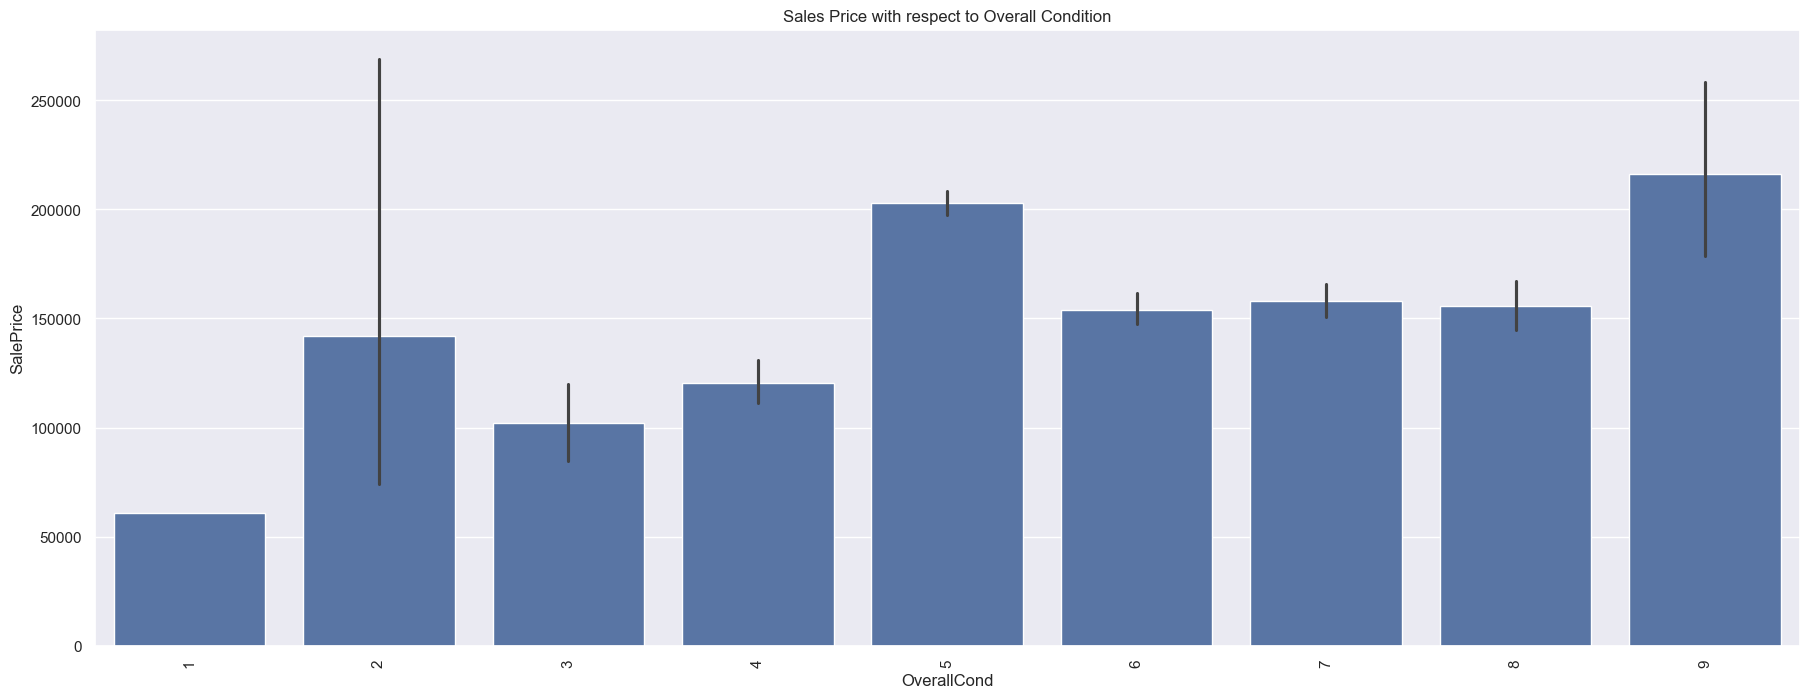

In [224]:
# bar plot for 'overall condition' vs 'Saleprice'

plt.figure(figsize=(22, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housingData)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

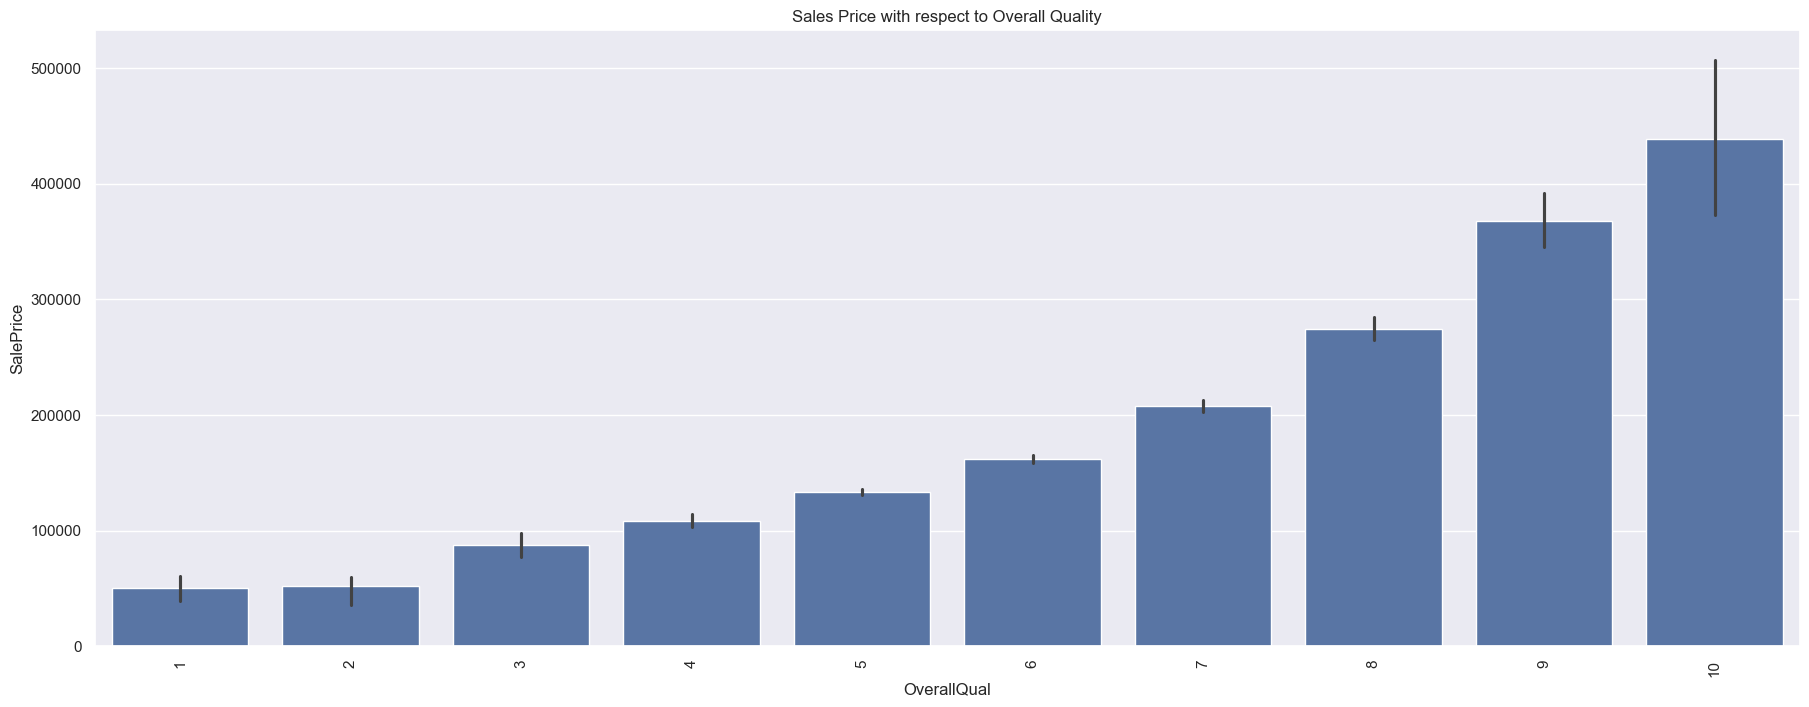

In [225]:
# bar plot for 'overall quality' vs 'Saleprice'

plt.figure(figsize=(22, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housingData)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

<Axes: xlabel='SalePrice', ylabel='Density'>

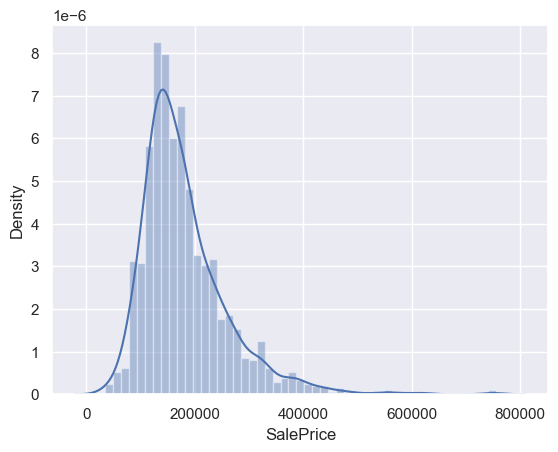

In [226]:
sns.distplot(housingData['SalePrice'])

In [227]:
#create a copy of data
housingDataRaw = housingData.copy

In [228]:
#Log Transformation
housingData['SalePrice']=np.log1p(housingData['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

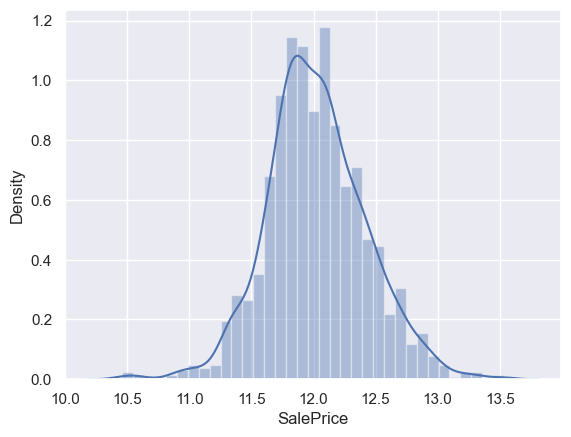

In [229]:
sns.distplot(housingData['SalePrice'])

In [230]:
# correlation matrix
housingCorr = numericData.corr()
housingCorr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

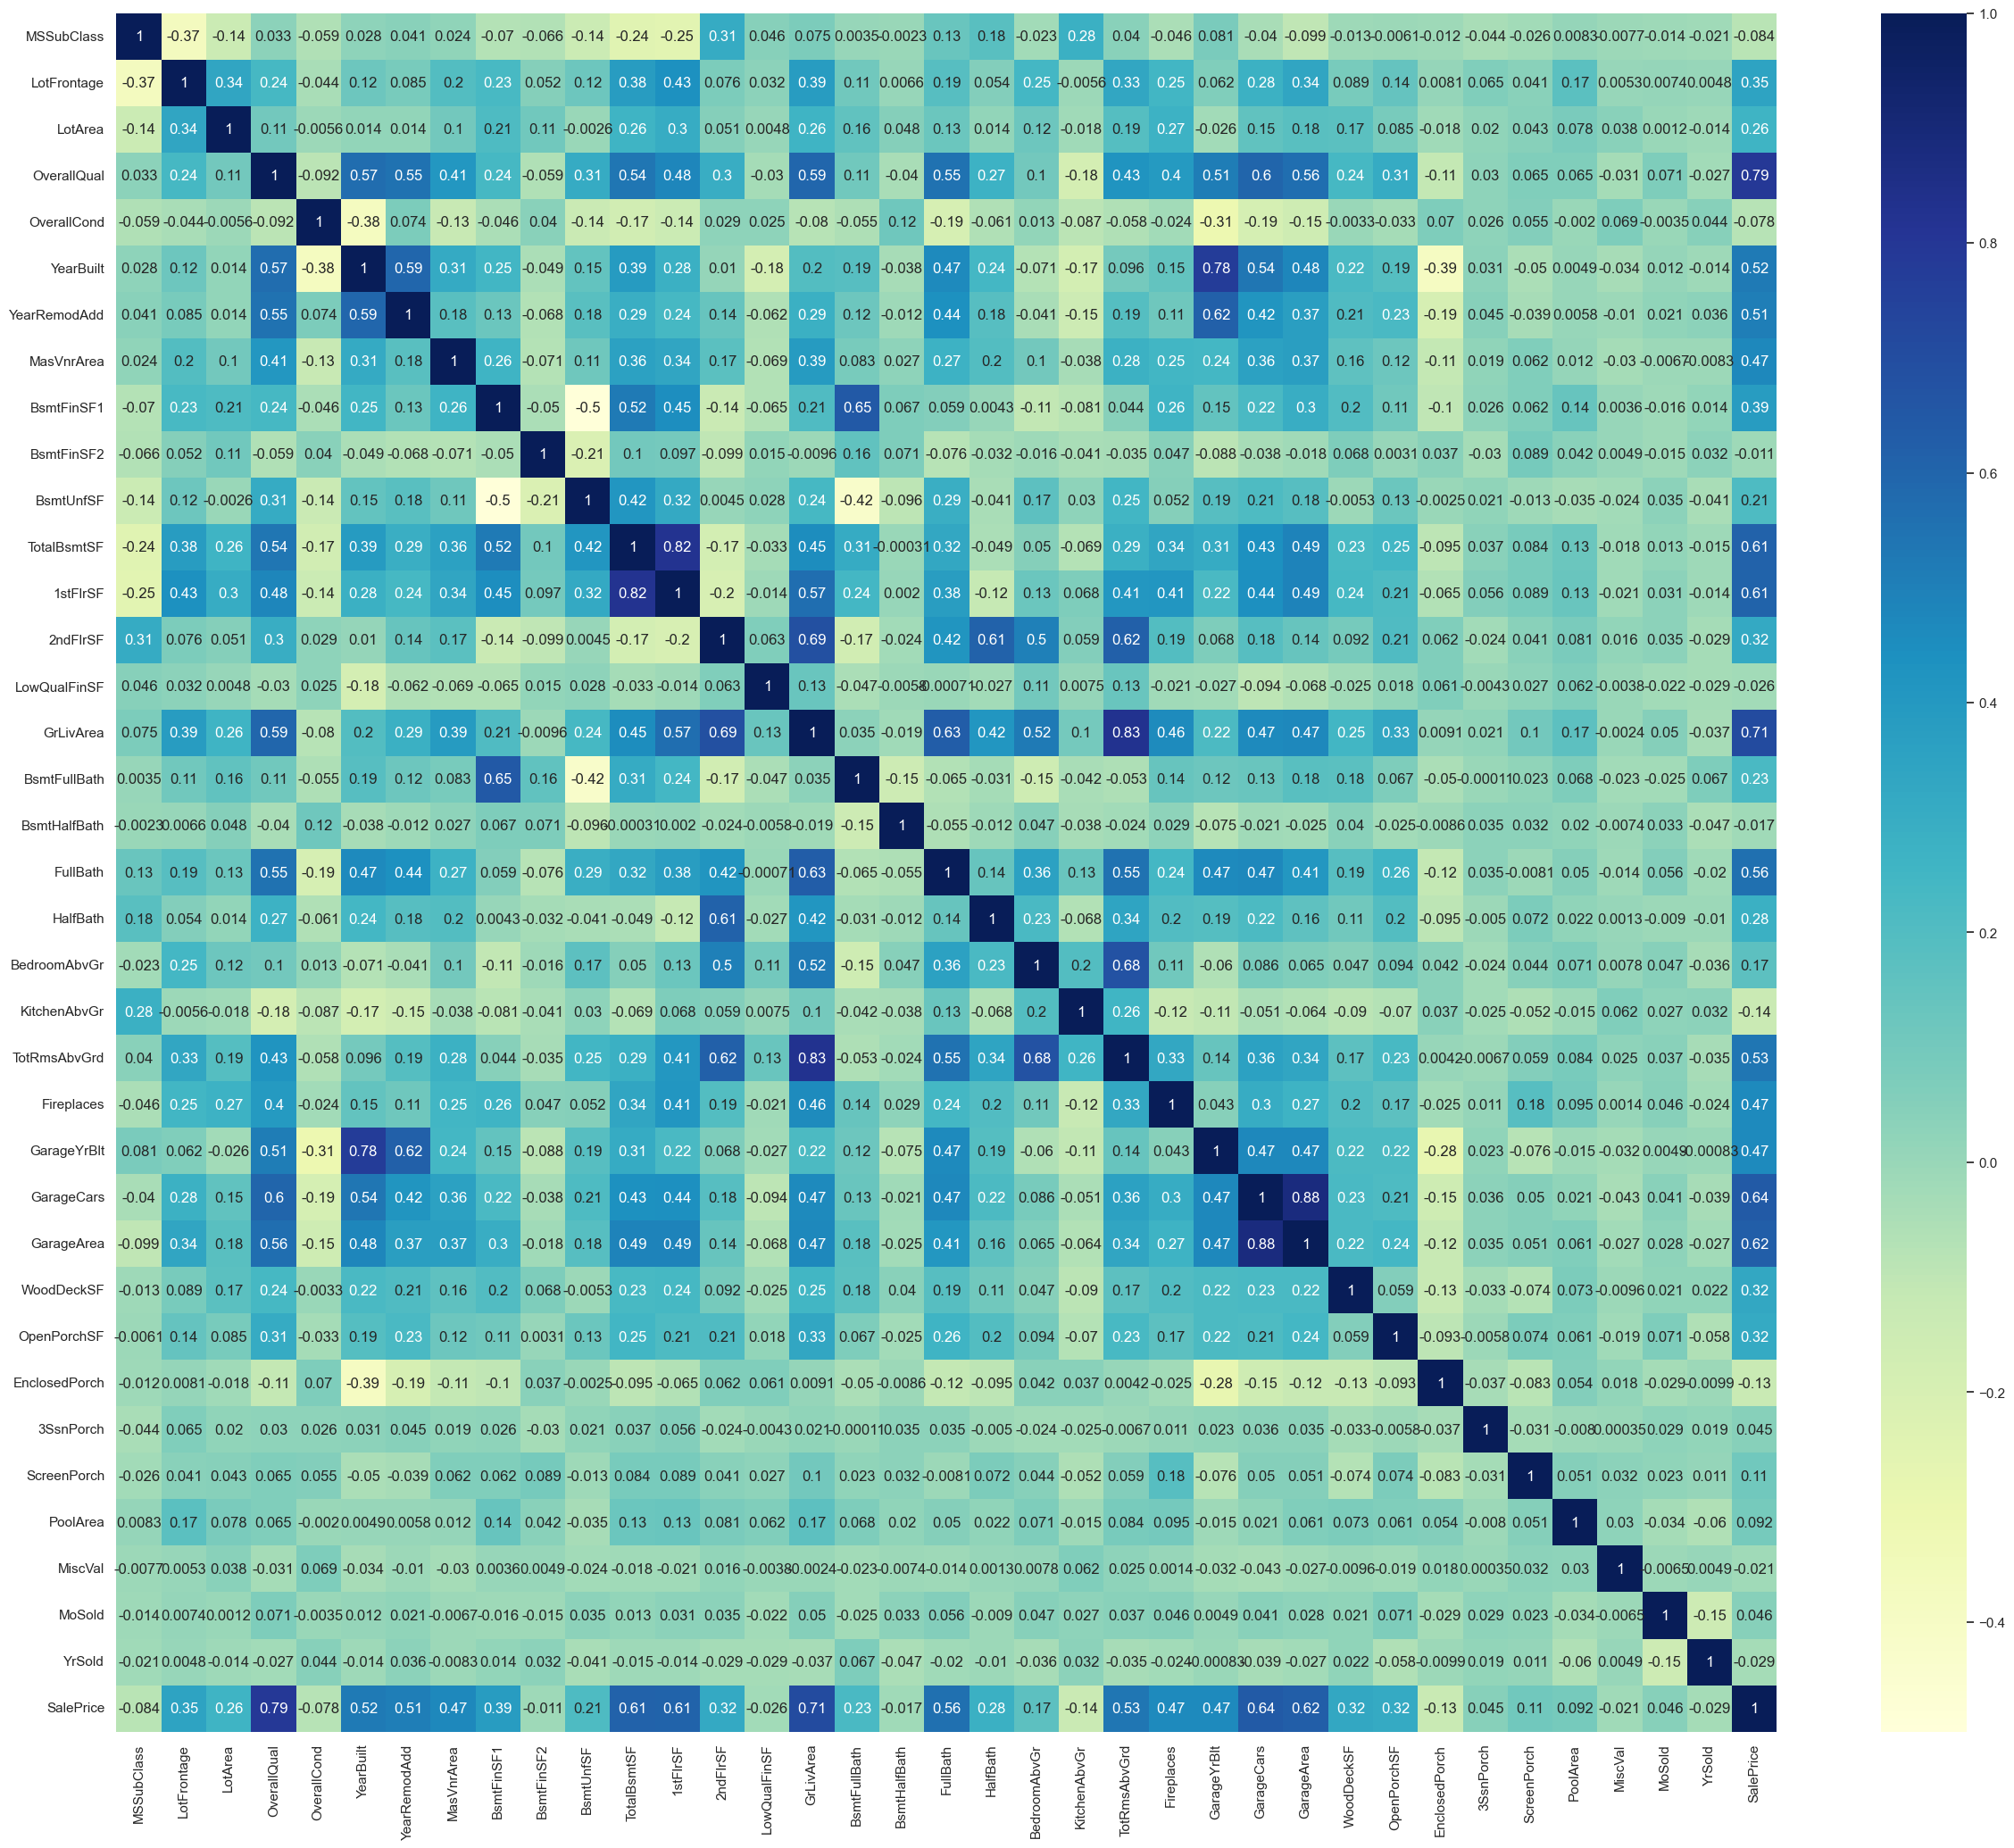

In [231]:
# Correlations on a heatmap
plt.figure(figsize=(30,25))
sns.heatmap(housingCorr, cmap="YlGnBu", annot=True)
plt.show()

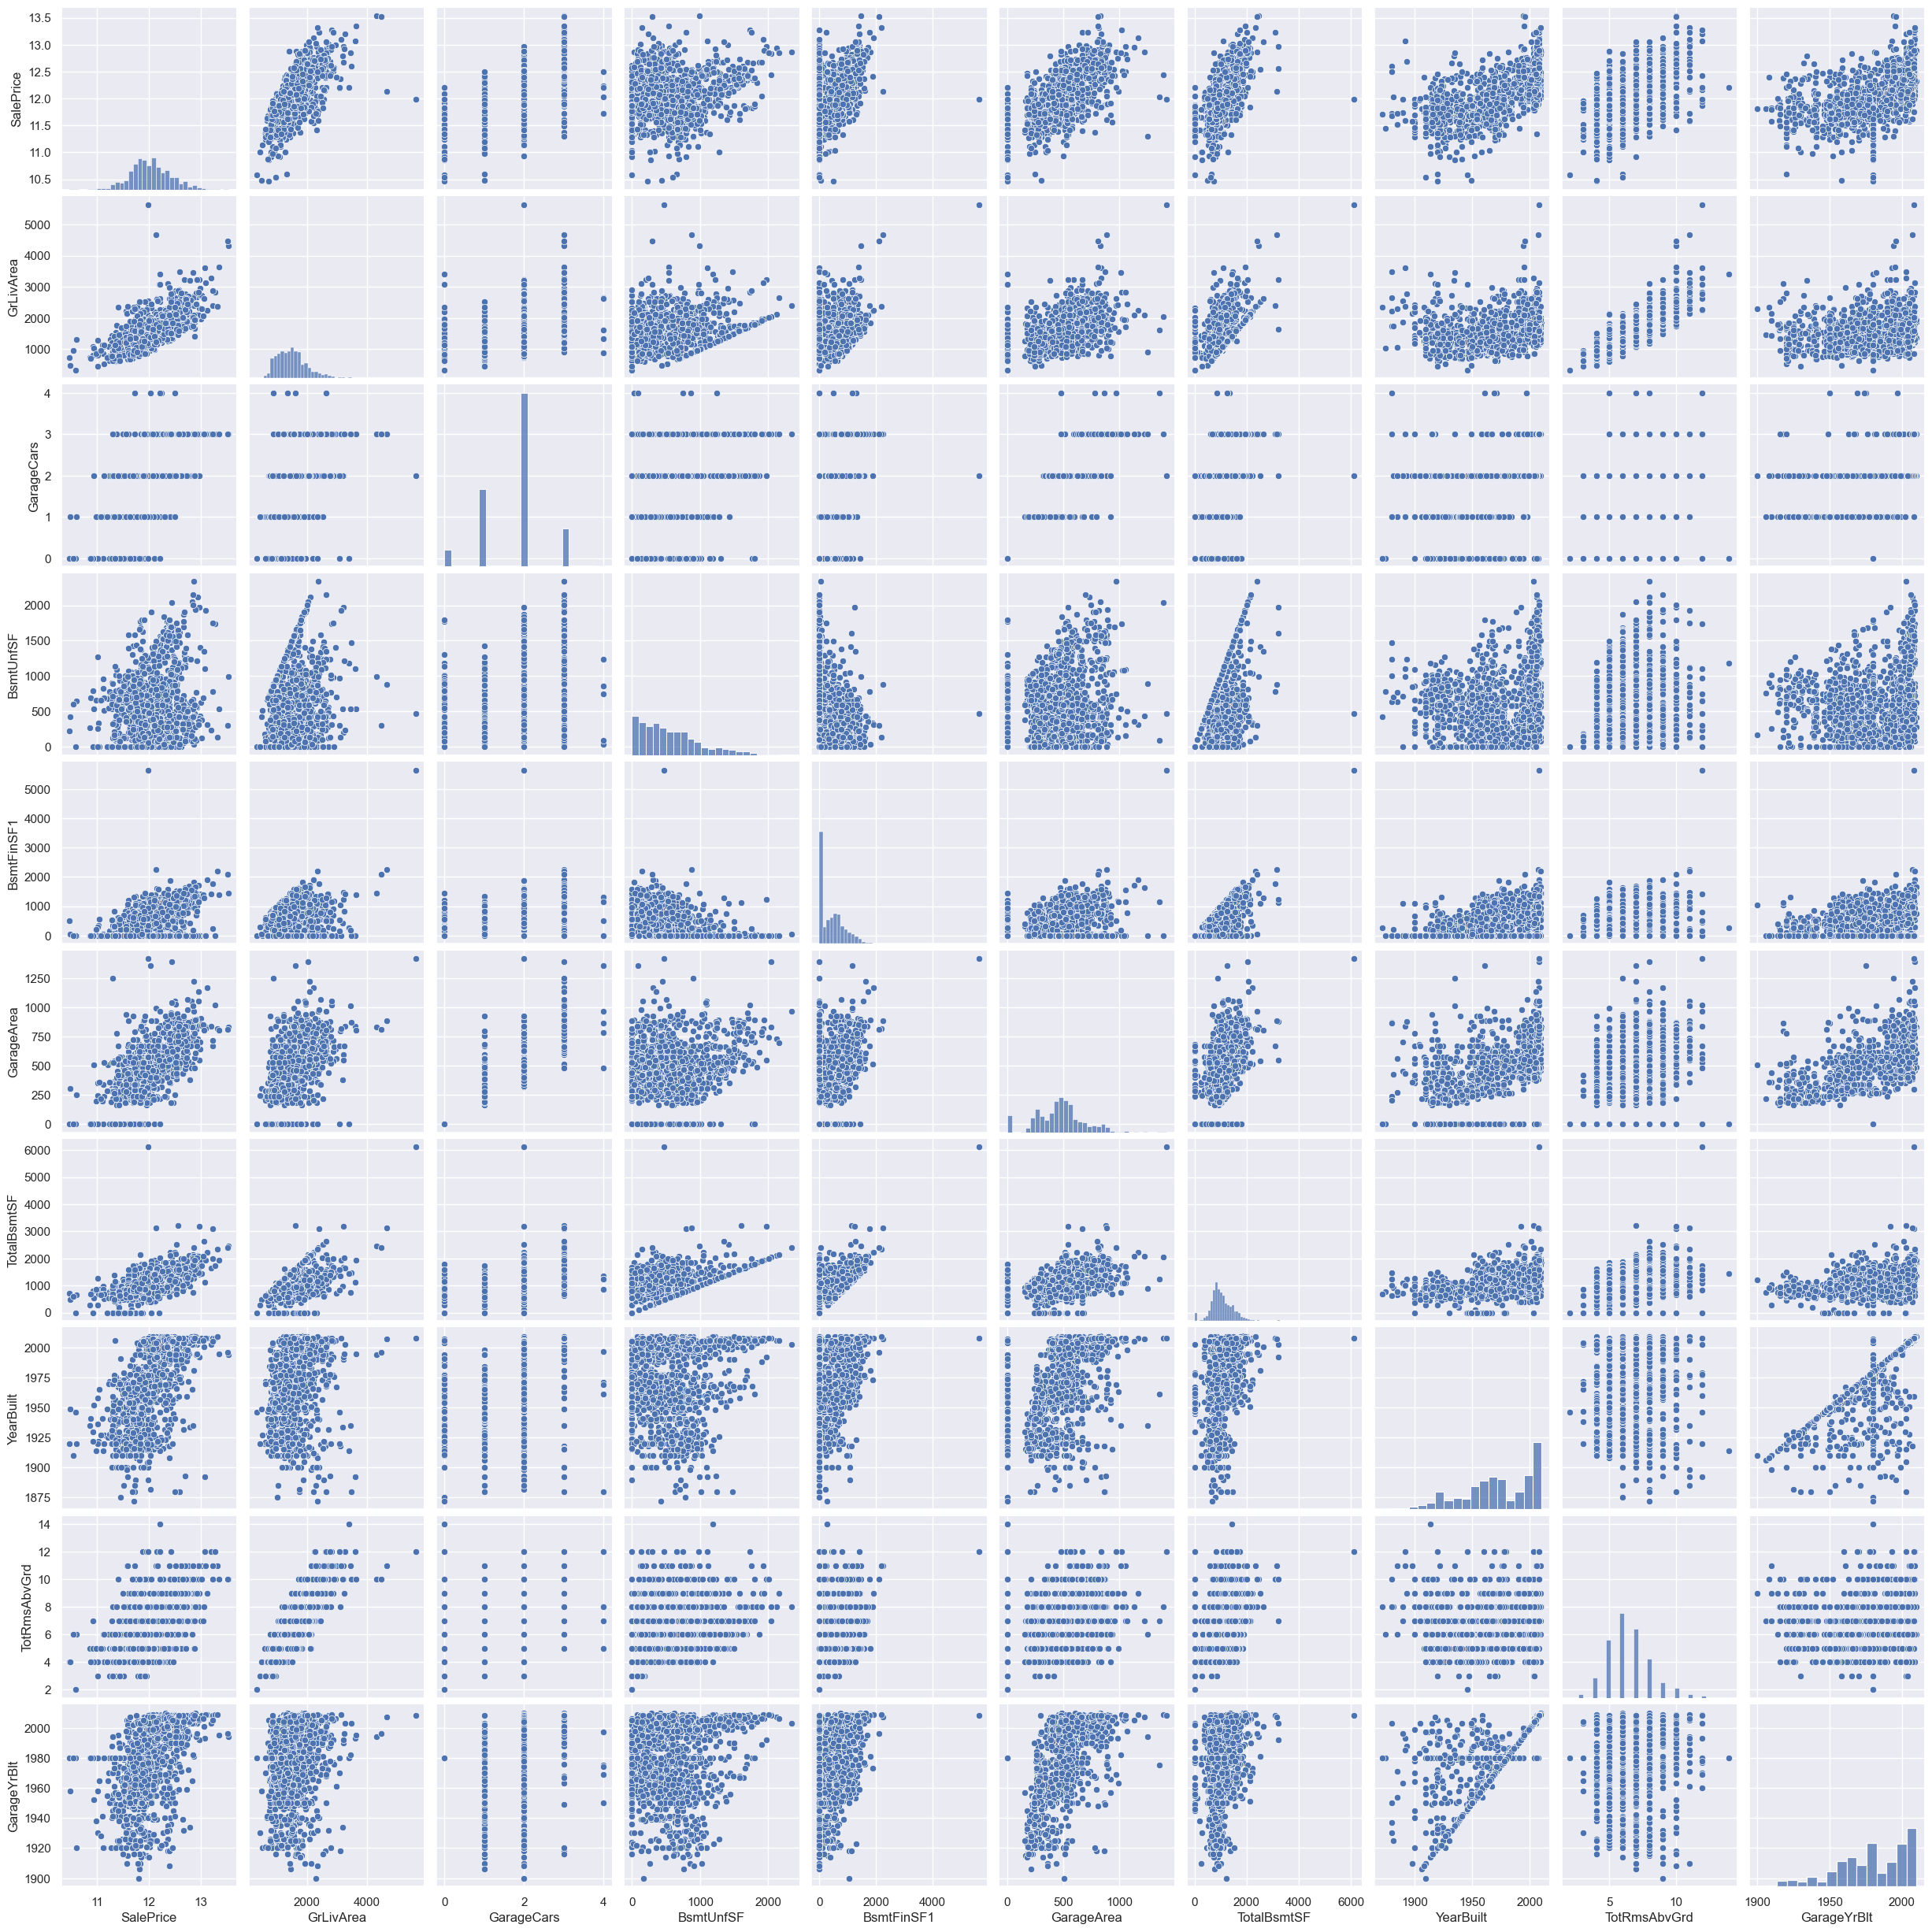

In [232]:
#check the predictive power of correlated columns
sns.set()
columnsList = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housingData[columnsList], size = 2.5)
plt.show()

In [233]:
# dropping columsn that are not contributing to DalePrice
housingData = housingData.drop(['GarageCars'], axis = 1)
housingData = housingData.drop(['BsmtUnfSF'], axis = 1)
housingData = housingData.drop(['TotRmsAbvGrd'], axis = 1)
housingData = housingData.drop(['GarageYrBlt'], axis = 1)    

In [234]:
#getting numeric columns
housingData.select_dtypes(exclude=['object'])

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008  12.247699  
1          5    2007  12.109016  
2          9    2008  12.317171  
3          2    2006  11.849405  
4         12    2008  12.429220  
...      ...     ...        ...  
1455       8    2007  12.072547  
1456       2    2010  12.254868  
1457       5    2010  12.493133  
1458       4    2010  11.864469  
1459       6    2008  11.901590  

[1460 rows x 33 columns]

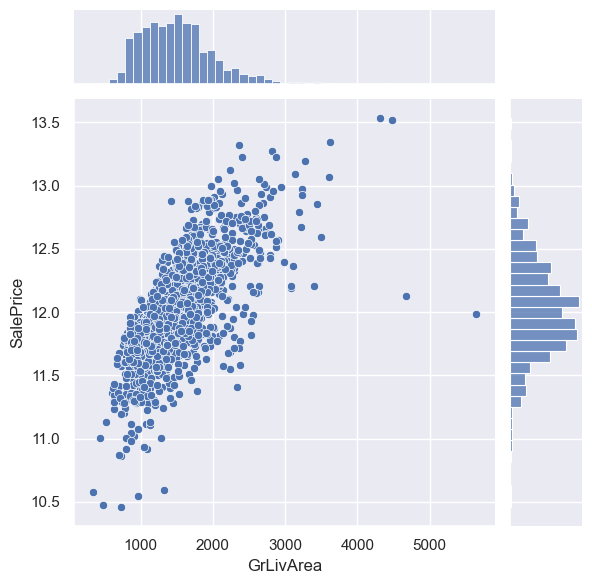

In [235]:
# plot for GrLivArea vs SalePrice
sns.jointplot(x='GrLivArea', y='SalePrice', data=housingData)
plt.show()

In [236]:
# function to remove outliers
def removeOutliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [237]:
# Removing some outliers seen in plot above
housingData = removeOutliers(housingData,'GrLivArea')

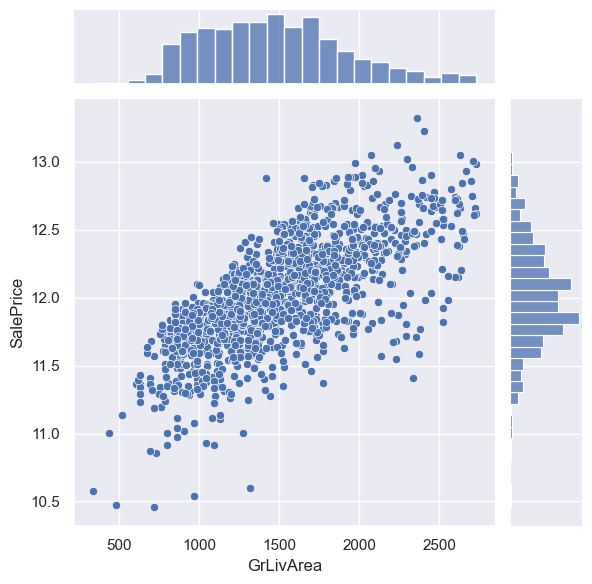

In [238]:
# plot for GrLivArea vs SalePrice
sns.jointplot(x=housingData['GrLivArea'], y=housingData['SalePrice'])
plt.show()

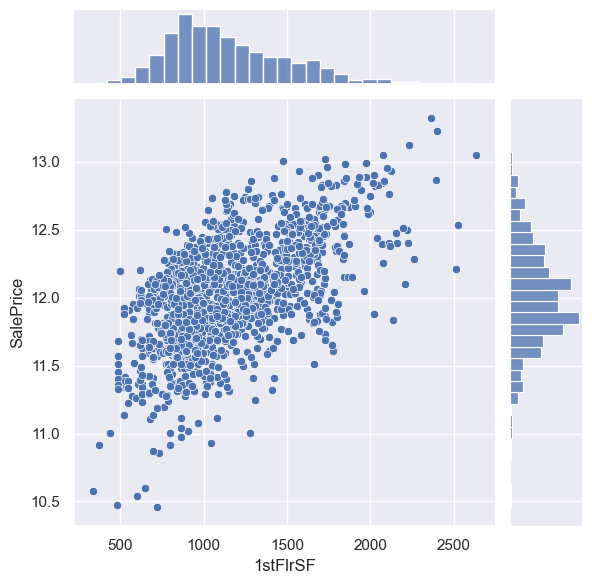

In [239]:
# plot for 1stFlrSF vs SalePrice
sns.jointplot(x = housingData['1stFlrSF'], y = housingData['SalePrice'])
plt.show()

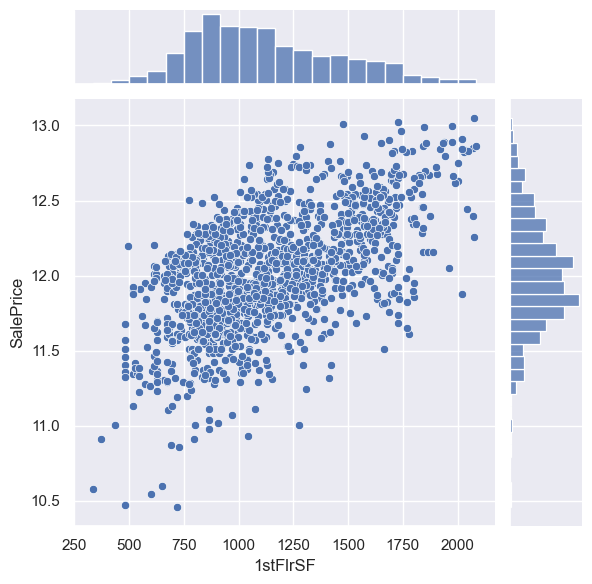

In [240]:
# Removing outliers of '1stFlrSF'
housingData = removeOutliers(housingData,'1stFlrSF')

# plot for 1stFlrSF vs SalePrice
sns.jointplot(x = housingData['1stFlrSF'], y = housingData['SalePrice'])
plt.show()

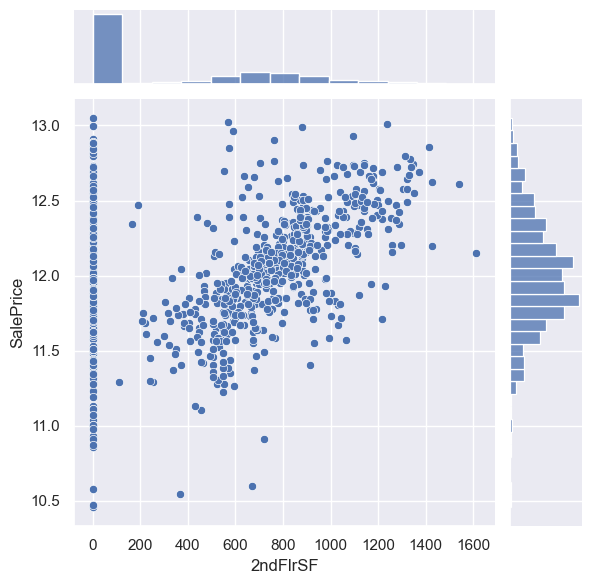

In [241]:
# plot for 2ndFlrSF vs SalePrice
sns.jointplot(x = housingData['2ndFlrSF'], y = housingData['SalePrice'])
plt.show()

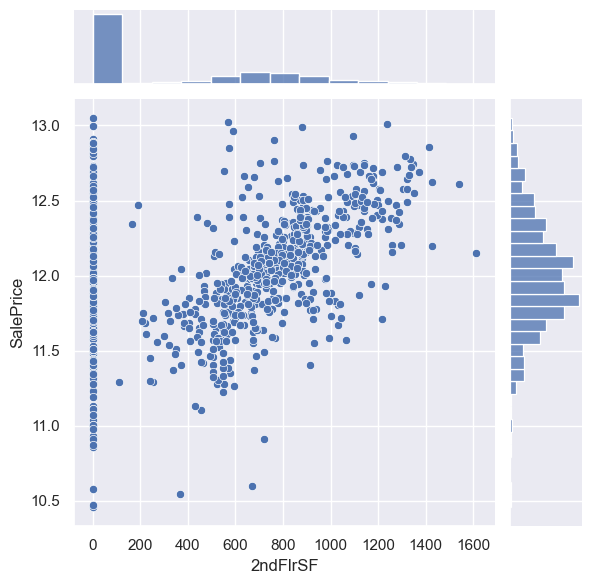

In [242]:
# Removing outliers of '2ndFlrSF'
housingData = removeOutliers(housingData,'2ndFlrSF')

# plot for 2ndFlrSF vs SalePrice
sns.jointplot(x = housingData['2ndFlrSF'], y = housingData['SalePrice'])
plt.show()

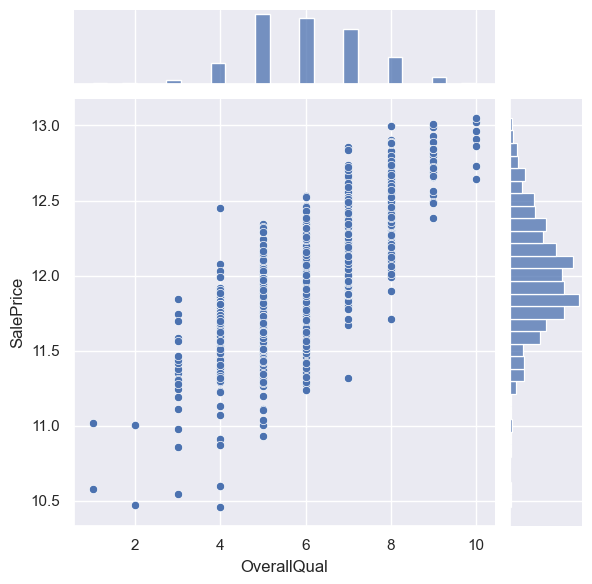

In [243]:
# plot for OverallQual vs SalePrice
sns.jointplot(x = housingData['OverallQual'], y = housingData['SalePrice'])
plt.show()

#### It is observed that Ground or First level houses i.e. '0' second floor Sq.Ft have a steady increase

In [244]:
# calculate Property Age from yearsold - yearbuilt
housingData['PropAge'] = (housingData['YrSold'] - housingData['YearBuilt'])
housingData.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    Inside  ...   None  None        None       0   
1         Lvl    AllPub       FR2  ...   None  None        None       0   
2         Lvl    AllPub    Inside  ...   None  None        None       0   
3         Lvl    AllPub    Corner  ...   None  None        None       0   
4         Lvl    AllPub       FR2  ...   None  None        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  PropAge  
0      2   2008        WD         Normal  12.247699        5  
1      5   2007        WD         Normal  12.109016       31  
2      9   2008        WD         Normal  12.317171        7  
3      2   2006        WD        Abnorml  11.849405       91  
4     12   2008        WD         Normal  12.429220        8  

[5 rows x 77 columns]

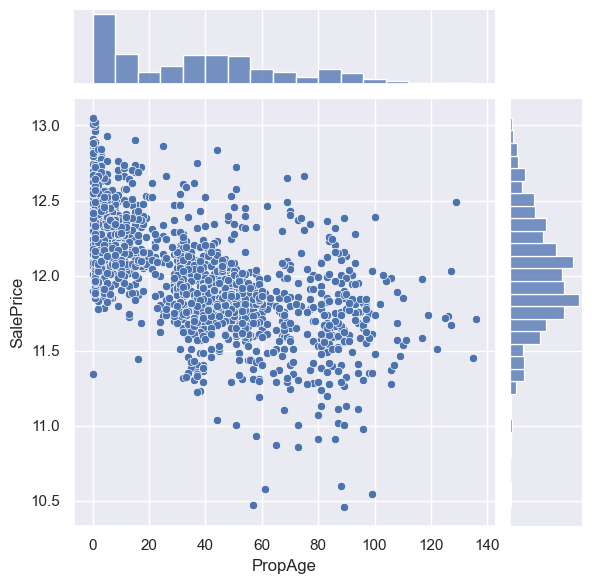

In [245]:
# plot for PropAge vs SalePrice
sns.jointplot(x = housingData['PropAge'], y = housingData['SalePrice'])
plt.show()

In [246]:
# dropping columns that are not requirerd
housingData = housingData.drop(['MoSold'], axis = 1)
housingData = housingData.drop(['YrSold'], axis = 1)
housingData = housingData.drop(['YearBuilt'], axis = 1)
housingData = housingData.drop(['YearRemodAdd'], axis = 1)
housingData.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0   None  None   
1         Lvl    AllPub       FR2  ...           0        0   None  None   
2         Lvl    AllPub    Inside  ...           0        0   None  None   
3         Lvl    AllPub    Corner  ...           0        0   None  None   
4         Lvl    AllPub       FR2  ...           0        0   None  None   

  MiscFeature MiscVal  SaleType  SaleCondition  SalePrice PropAge  
0        None       0        WD         Normal  12.247699       5  
1        None       0        WD         Normal  12.109016      31  
2        None       0        WD         Normal  12.317171       7  
3        None       0        WD        Abnorml  11.849405      91  
4        None       0        WD         Normal  12.429220       8  

[5 rows x 73 columns]

In [247]:
housingData.Street.value_counts()

Street
Pave    1403
Grvl       6
Name: count, dtype: int64

In [248]:
housingData.Utilities.value_counts()

Utilities
AllPub    1408
NoSeWa       1
Name: count, dtype: int64

In [249]:
# drop columns that show low variance 
housingData = housingData.drop(['Street'], axis = 1)
housingData = housingData.drop(['Utilities'], axis = 1)

In [250]:
# select numeric columns to check variance
numericData= housingData.select_dtypes(include=['float64', 'int64'])
numericData

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0             60         65.0     8450            7            5       196.0   
1             20         80.0     9600            6            8         0.0   
2             60         68.0    11250            7            5       162.0   
3             70         60.0     9550            7            5         0.0   
4             60         84.0    14260            8            5       350.0   
...          ...          ...      ...          ...          ...         ...   
1455          60         62.0     7917            6            5         0.0   
1456          20         85.0    13175            6            6       119.0   
1457          70         66.0     9042            7            9         0.0   
1458          20         68.0     9717            5            6         0.0   
1459          20         75.0     9937            5            6         0.0   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  GarageArea  \
0            706           0          856       856  ...         548   
1            978           0         1262      1262  ...         460   
2            486           0          920       920  ...         608   
3            216           0          756       961  ...         642   
4            655           0         1145      1145  ...         836   
...          ...         ...          ...       ...  ...         ...   
1455           0           0          953       953  ...         460   
1456         790         163         1542      2073  ...         500   
1457         275           0         1152      1188  ...         252   
1458          49        1029         1078      1078  ...         240   
1459         830         290         1256      1256  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1455           0           40              0          0            0   
1456         349            0              0          0            0   
1457           0           60              0          0            0   
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea  MiscVal  SalePrice  PropAge  
0            0        0  12.247699        5  
1            0        0  12.109016       31  
2            0        0  12.317171        7  
3            0        0  11.849405       91  
4            0        0  12.429220        8  
...        ...      ...        ...      ...  
1455         0        0  12.072547        8  
1456         0        0  12.254868       32  
1457         0     2500  12.493133       69  
1458         0        0  11.864469       60  
1459         0        0  11.901590       43  

[1409 rows x 30 columns]

In [251]:
for i in numericData:
    print(housingData[i].value_counts())

MSSubClass
20     514
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: count, dtype: int64
LotFrontage
60.0     150
80.0     108
70.0      94
65.0      74
73.0      68
        ... 
140.0      1
141.0      1
112.0      1
33.0       1
46.0       1
Name: count, Length: 112, dtype: int64
LotArea
7200     25
9600     23
6000     17
9000     14
8400     14
         ..
2500      1
10289     1
12243     1
1526      1
9717      1
Name: count, Length: 1028, dtype: int64
OverallQual
5     395
6     367
7     309
8     153
4     116
9      37
3      20
10      7
2       3
1       2
Name: count, dtype: int64
OverallCond
5    793
6    245
7    197
8     72
4     56
3     22
9     18
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0      848
108.0      8
180.0      8
72.0       8
120.0      7
        ... 
333.0      1
921.0      1
594.0      1
219.0      1
119.0      1
Name: count, 

In [252]:
 # drop few more columns with very low variance
 housingData = housingData.drop(['Condition2','PoolQC', 'Alley', 'RoofMatl', 'GarageCond', 'Fence', 'Heating', 'Functional','MiscVal' ], axis = 1)

In [253]:
# select numeric columns
numericData= housingData.select_dtypes(include=['float64', 'int64'])
numericData

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0             60         65.0     8450            7            5       196.0   
1             20         80.0     9600            6            8         0.0   
2             60         68.0    11250            7            5       162.0   
3             70         60.0     9550            7            5         0.0   
4             60         84.0    14260            8            5       350.0   
...          ...          ...      ...          ...          ...         ...   
1455          60         62.0     7917            6            5         0.0   
1456          20         85.0    13175            6            6       119.0   
1457          70         66.0     9042            7            9         0.0   
1458          20         68.0     9717            5            6         0.0   
1459          20         75.0     9937            5            6         0.0   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  Fireplaces  \
0            706           0          856       856  ...           0   
1            978           0         1262      1262  ...           1   
2            486           0          920       920  ...           1   
3            216           0          756       961  ...           1   
4            655           0         1145      1145  ...           1   
...          ...         ...          ...       ...  ...         ...   
1455           0           0          953       953  ...           1   
1456         790         163         1542      2073  ...           2   
1457         275           0         1152      1188  ...           2   
1458          49        1029         1078      1078  ...           0   
1459         830         290         1256      1256  ...           0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1455         460           0           40              0          0   
1456         500         349            0              0          0   
1457         252           0           60              0          0   
1458         240         366            0            112          0   
1459         276         736           68              0          0   

      ScreenPorch  PoolArea  SalePrice  PropAge  
0               0         0  12.247699        5  
1               0         0  12.109016       31  
2               0         0  12.317171        7  
3               0         0  11.849405       91  
4               0         0  12.429220        8  
...           ...       ...        ...      ...  
1455            0         0  12.072547        8  
1456            0         0  12.254868       32  
1457            0         0  12.493133       69  
1458            0         0  11.864469       60  
1459            0         0  11.901590       43  

[1409 rows x 29 columns]

In [254]:
numericColumns = list(numericData)
numericColumns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'PropAge']

In [255]:
categoricalData = housingData.select_dtypes(include=['object'])
categoricalColumns = list(categoricalData)
categoricalColumns

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [256]:
#Create dummy values
housingData = pd.get_dummies(housingData, drop_first=True )
housingData.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...           False   
1         978           0         1262      1262  ...           False   
2         486           0          920       920  ...           False   
3         216           0          756       961  ...           False   
4         655           0         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 210 columns]

In [257]:
X = housingData.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...           False   
1         978           0         1262      1262  ...           False   
2         486           0          920       920  ...           False   
3         216           0          756       961  ...           False   
4         655           0         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 209 columns]

In [258]:
y = housingData['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [259]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [260]:
numericColumns.remove('SalePrice')
print(numericColumns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']


In [261]:
scaler = StandardScaler()
X_train[numericColumns] = scaler.fit_transform(X_train[numericColumns])
X_test[numericColumns] = scaler.fit_transform(X_test[numericColumns])

In [262]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
397     0.079544    -0.010273 -0.260605    -0.755548    -0.516303    1.197252   
365     0.319028    -0.515485  0.049650    -0.755548     1.295352   -0.592783   
632    -0.878390     0.798065  0.170750     0.741879    -0.516303    0.706236   
1366    0.079544    -0.060794 -0.101574     0.741879    -0.516303    0.389250   
1240    0.079544    -0.212358 -0.203758     0.741879    -0.516303    0.973498   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
397     0.293423   -0.277564    -0.418019 -0.758558  ...           False   
365     0.086866   -0.277564    -0.915895 -1.371166  ...           False   
632     0.986863   -0.277564     0.935583  0.848038  ...           False   
1366    0.522110   -0.277564    -0.394681 -0.740540  ...           False   
1240    0.318013   -0.277564    -0.366157 -0.734534  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
397            False         False         False         True   
365            False         False         False         True   
632            False         False         False         True   
1366           False         False         False         True   
1240           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
397                   False                 False                 False   
365                   False                 False                 False   
632                   False                 False                  True   
1366                  False                 False                 False   
1240                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
397                   True                  False  
365                   True                  False  
632                  False                  False  
1366                 False                  False  
1240                  True                  False  

[5 rows x 209 columns]

In [263]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
257   -0.868084    -0.061597 -0.166423     0.691274    -0.530192    0.514212   
614    2.723109    -2.079063 -0.932461    -1.575462     0.381480   -0.553447   
383   -0.306960    -0.404995 -0.146966    -0.064305    -2.353536   -0.553447   
630    0.254164    -0.834243 -0.146966    -0.819883     0.381480   -0.553447   
732    0.029714     0.238877  0.104510     0.691274    -0.530192    0.644704   

     BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
257    2.014737   -0.303021     1.499241  1.406658  ...           False   
614   -0.652013    2.870683    -1.047537 -1.492043  ...           False   
383   -0.989861   -0.303021    -0.644863 -1.033727  ...           False   
630   -0.989861   -0.303021    -1.031848 -0.126023  ...           False   
732   -0.422276   -0.303021     0.319984  0.064447  ...           False   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
257           False         False         False         True   
614           False         False         False         True   
383           False         False         False         True   
630           False         False         False         True   
732           False         False         False         True   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
257                  False                 False                 False   
614                  False                 False                 False   
383                  False                 False                 False   
630                  False                 False                 False   
732                  False                 False                 False   

     SaleCondition_Normal  SaleCondition_Partial  
257                 False                  False  
614                  True                  False  
383                  True                  False  
630                 False                  False  
732                  True                  False  

[5 rows x 209 columns]

In [264]:
# run RFE
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(estimator = lm, n_features_to_select = 100)
rfe = rfe.fit(X_train, y_train)

In [265]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 72),
 ('LotFrontage', False, 61),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 104),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 27),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 90),
 ('FullBath', False, 87),
 ('HalfBath', False, 76),
 ('BedroomAbvGr', False, 73),
 ('KitchenAbvGr', False, 63),
 ('Fireplaces', False, 51),
 ('GarageArea', False, 19),
 ('WoodDeckSF', False, 49),
 ('OpenPorchSF', False, 56),
 ('EnclosedPorch', False, 43),
 ('3SsnPorch', False, 92),
 ('ScreenPorch', False, 47),
 ('PoolArea', False, 84),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 97),
 ('LotShape_IR3', False, 74),
 ('LotShape_Reg', False, 95),
 ('LandContour_HLS', False, 8),
 ('L

In [266]:
# get top 100 variables
columnsTop = X_train.columns[rfe.support_]
columnsTop

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'Ex

In [267]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageQual_Po', 'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=109)

In [268]:
# Create dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train[columnsTop])
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
397  -0.260605    -0.755548    -0.516303    0.293423    -0.418019 -0.758558   
365   0.049650    -0.755548     1.295352    0.086866    -0.915895 -1.371166   
632   0.170750     0.741879    -0.516303    0.986863     0.935583  0.848038   
1366 -0.101574     0.741879    -0.516303    0.522110    -0.394681 -0.740540   
1240 -0.203758     0.741879    -0.516303    0.318013    -0.366157 -0.734534   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  ...  MiscFeature_None  \
397   1.439409     -0.097393   0.776704  0.260243  ...              True   
365   0.809887     -0.097393  -0.269332  1.709031  ...              True   
632  -0.792532     -0.097393  -0.119579 -0.167807  ...              True   
1366  1.372641     -0.097393   0.727531 -0.925128  ...              True   
1240  1.315412     -0.097393   0.678359 -1.056836  ...              True   

      MiscFeature_Othr  MiscFeature_Shed  SaleType_Con  SaleType_ConLD  \
397              False             False         False           False   
365              False             False         False           False   
632              False             False         False           False   
1366             False             False         False           False   
1240             False             False         False           False   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  \
397          False         False                  False                  True   
365          False         False                  False                  True   
632          False         False                  False                 False   
1366         False         False                  False                 False   
1240         False         False                  False                  True   

      SaleCondition_Partial  
397                   False  
365                   False  
632                   False  
1366                  False  
1240                  False  

[5 rows x 100 columns]

In [269]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9392389961841235

In [270]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.422704143338063e+20

In [271]:
# Since Test R2 is too low, let us check with some alternate methods of Regression
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 72),
 ('LotFrontage', False, 61),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 104),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 27),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 90),
 ('FullBath', False, 87),
 ('HalfBath', False, 76),
 ('BedroomAbvGr', False, 73),
 ('KitchenAbvGr', False, 63),
 ('Fireplaces', False, 51),
 ('GarageArea', False, 19),
 ('WoodDeckSF', False, 49),
 ('OpenPorchSF', False, 56),
 ('EnclosedPorch', False, 43),
 ('3SsnPorch', False, 92),
 ('ScreenPorch', False, 47),
 ('PoolArea', False, 84),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 97),
 ('LotShape_IR3', False, 74),
 ('LotShape_Reg', False, 95),
 ('LandContour_HLS', False, 8),
 ('L

In [272]:
# Select the top 100 variables
columnsTop = X_test.columns[rfe.support_]
columnsTop

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'Ex

In [273]:
X_test_rfe = X_test[columnsTop]
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
257 -0.166423     0.691274    -0.530192    2.014737     1.499241  1.406658   
614 -0.932461    -1.575462     0.381480   -0.652013    -1.047537 -1.492043   
383 -0.146966    -0.064305    -2.353536   -0.989861    -0.644863 -1.033727   
630 -0.146966    -0.819883     0.381480   -0.989861    -1.031848 -0.126023   
732  0.104510     0.691274    -0.530192   -0.422276     0.319984  0.064447   

     2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  ...  MiscFeature_None  \
257 -0.812685      -0.12851   0.314269 -1.110065  ...              True   
614 -0.812685      -0.12851  -1.942057  0.081360  ...              True   
383 -0.812685      -0.12851  -1.585308  1.545109  ...              True   
630  0.812028      -0.12851   0.652486  3.076941  ...              True   
732  1.345406      -0.12851   1.303438 -0.871780  ...              True   

     MiscFeature_Othr  MiscFeature_Shed  SaleType_Con  SaleType_ConLD  \
257             False             False         False           False   
614             False             False         False           False   
383             False             False         False           False   
630             False             False         False           False   
732             False             False         False           False   

     SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  \
257         False         False                  False                 False   
614         False         False                  False                  True   
383         False         False                  False                  True   
630         False         False                  False                 False   
732         False         False                  False                  True   

     SaleCondition_Partial  
257                  False  
614                  False  
383                  False  
630                  False  
732                  False  

[5 rows x 100 columns]

### Lasso Regression

In [274]:
# Checke the shape of X_train, y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (986, 209)
y_train (986,)


In [275]:
# Alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# Cross Validation
folds = 5
cvModel = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

cvModel.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
results = pd.DataFrame(cvModel.cv_results_)
results = results[results['param_alpha']<=1]
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.125154      0.017080         0.003106        0.006211      0.0001   
1       0.024978      0.007622         0.003118        0.006235       0.001   
2       0.015648      0.000065         0.009362        0.007644        0.01   
3       0.012506      0.006253         0.006241        0.007643        0.05   
4       0.012518      0.006259         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.081522          -0.083653          -0.089245   
1   {'alpha': 0.001}          -0.077645          -0.081575          -0.085921   
2    {'alpha': 0.01}          -0.079687          -0.089528          -0.093714   
3    {'alpha': 0.05}          -0.112148          -0.112526          -0.116699   
4     {'alpha': 0.1}          -0.152164          -0.142942          -0.146512   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.078099  ...        -0.082420        0.003890                2   
1          -0.075164  ...        -0.079973        0.003651                1   
2          -0.084485  ...        -0.088681        0.005966                3   
3          -0.114473  ...        -0.116450        0.005235                4   
4          -0.151087  ...        -0.151768        0.007907                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.064495           -0.063448           -0.063205   
1           -0.074625           -0.073047           -0.072228   
2           -0.089218           -0.085583           -0.085043   
3           -0.116722           -0.114788           -0.113356   
4           -0.152219           -0.150417           -0.148326   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.066158           -0.063994         -0.064260         0.001049  
1           -0.074568           -0.072723         -0.073438         0.000981  
2           -0.088290           -0.086078         -0.086842         0.001622  
3           -0.115691           -0.114616         -0.115035         0.001125  
4           -0.150361           -0.151827         -0.150630         0.001370  

[5 rows x 21 columns]

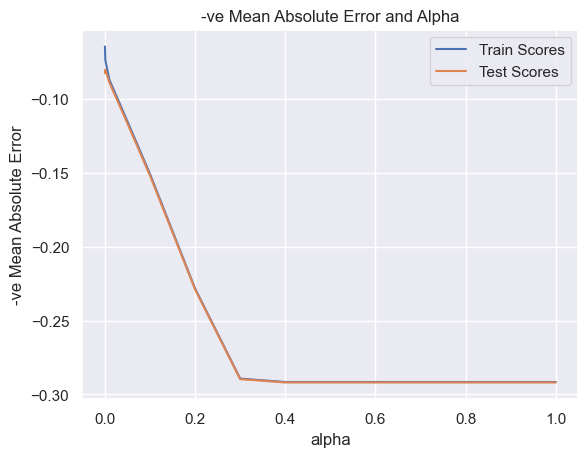

In [277]:
# plot mean train and test scores with Alpha
results['param_alpha'] = results['param_alpha'].astype('float32')
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('-ve Mean Absolute Error')
plt.title("-ve Mean Absolute Error and Alpha")
plt.legend(['Train Scores', 'Test Scores'], loc='upper right')
plt.show()

In [278]:
# Alpha = 0.01

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00359419,  0.01347667,  0.0133999 ,  0.10350602,  0.04642744,
        0.        ,  0.03099662,  0.        ,  0.0480001 ,  0.        ,
        0.        , -0.00061311,  0.12956902,  0.00788449,  0.        ,
        0.        ,  0.        ,  0.        , -0.0127063 ,  0.02102846,
        0.02757277,  0.00613839,  0.00132248,  0.        ,  0.        ,
        0.00340964,  0.        , -0.09990709,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [279]:
# lasso Model Parameters
modelParameters = list(lasso.coef_ )
modelParameters.insert(0, lasso.intercept_)
modelParameters = [round(x, 3) for x in modelParameters]
columns = X.columns
columns = columns.insert(0, "constant")
list(zip(columns, modelParameters))

[('constant', 11.995),
 ('MSSubClass', -0.004),
 ('LotFrontage', 0.013),
 ('LotArea', 0.013),
 ('OverallQual', 0.104),
 ('OverallCond', 0.046),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.048),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.13),
 ('BsmtFullBath', 0.008),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.013),
 ('Fireplaces', 0.021),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.006),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.003),
 ('PoolArea', 0.0),
 ('PropAge', -0.1),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0

In [280]:
# lasso regression - R2 values
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8869690265467509
0.8747706716572385


In [281]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13493917395293614


#### The R2 scores for Train and Test almost match, indicating an good model

In [282]:
# Make a dataframe for the coefficients obtained from Lasso
mod = list(zip(columns, modelParameters))

In [283]:
parameters = pd.DataFrame(mod)
parameters.columns = ['Variable', 'Coeff']
parameters = parameters.sort_values((['Coeff']), axis = 0, ascending = False)
parameters

Variable   Coeff
0                 constant  11.995
13               GrLivArea   0.130
4              OverallQual   0.104
9              TotalBsmtSF   0.048
5              OverallCond   0.046
..                     ...     ...
209  SaleCondition_Partial   0.000
12            LowQualFinSF  -0.001
1               MSSubClass  -0.004
19            KitchenAbvGr  -0.013
28                 PropAge  -0.100

[210 rows x 2 columns]

In [284]:
# Get variables whose coefficients are non-zero
pred = pd.DataFrame(parameters[(parameters['Coeff'] != 0)])
pred

Variable   Coeff
0            constant  11.995
13          GrLivArea   0.130
4         OverallQual   0.104
9         TotalBsmtSF   0.048
5         OverallCond   0.046
7          BsmtFinSF1   0.031
21         GarageArea   0.028
20         Fireplaces   0.021
2         LotFrontage   0.013
3             LotArea   0.013
14       BsmtFullBath   0.008
22         WoodDeckSF   0.006
26        ScreenPorch   0.003
133  Foundation_PConc   0.001
23        OpenPorchSF   0.001
12       LowQualFinSF  -0.001
1          MSSubClass  -0.004
19       KitchenAbvGr  -0.013
28            PropAge  -0.100

In [285]:
pred.shape

(19, 2)

In [286]:
lassoVar = list(pred['Variable'])
print(lassoVar)

['constant', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotFrontage', 'LotArea', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'Foundation_PConc', 'OpenPorchSF', 'LowQualFinSF', 'MSSubClass', 'KitchenAbvGr', 'PropAge']


In [287]:
X_trainLasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'LotArea', 'Fireplaces', 'BsmtFullBath', 'WoodDeckSF', 'HalfBath', '3SsnPorch', 'KitchenAbvGr', 'PropAge']]
X_trainLasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
397    0.776704    -0.755548    -0.516303    -0.418019   -0.977850   
365   -0.269332    -0.755548     1.295352    -0.915895    0.018208   
632   -0.119579     0.741879    -0.516303     0.935583    0.389289   
1366   0.727531     0.741879    -0.516303    -0.394681    0.604125   
1240   0.678359     0.741879    -0.516303    -0.366157    0.384406   

      BsmtFinSF1   LotArea  Fireplaces  BsmtFullBath  WoodDeckSF  HalfBath  \
397     0.293423 -0.260605    0.656407     -0.802889   -0.766213 -0.739404   
365     0.086866  0.049650   -0.949591     -0.802889   -0.766213 -0.739404   
632     0.986863  0.170750    0.656407     -0.802889    0.835118 -0.739404   
1366    0.522110 -0.101574   -0.949591      1.176233   -0.766213  1.274553   
1240    0.318013 -0.203758   -0.949591      1.176233   -0.766213  1.274553   

      3SsnPorch  KitchenAbvGr   PropAge  
397   -0.112334     -0.216337  0.260243  
365   -0.112334     -0.216337  1.709031  
632   -0.112334     -0.216337 -0.167807  
1366  -0.112334     -0.216337 -0.925128  
1240  -0.112334     -0.216337 -1.056836

In [288]:
X_trainLasso.shape

(986, 14)

In [289]:
X_testLasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'LotArea', 'Fireplaces', 'BsmtFullBath', 'WoodDeckSF', 'HalfBath', '3SsnPorch', 'KitchenAbvGr', 'PropAge']]
X_testLasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  BsmtFinSF1  \
257   0.314269     0.691274    -0.530192     1.499241    0.907531    2.014737   
614  -1.942057    -1.575462     0.381480    -1.047537   -2.173150   -0.652013   
383  -1.585308    -0.064305    -2.353536    -0.644863   -0.492779   -0.989861   
630   0.652486    -0.819883     0.381480    -1.031848   -1.052902   -0.989861   
732   1.303438     0.691274    -0.530192     0.319984    0.352075   -0.422276   

      LotArea  Fireplaces  BsmtFullBath  WoodDeckSF  HalfBath  3SsnPorch  \
257 -0.166423    0.657083      1.009918    0.240203  1.181066  -0.126407   
614 -0.932461   -0.887062      1.009918    0.033687 -0.770461  -0.126407   
383 -0.146966   -0.887062     -0.831441   -0.700592 -0.770461  -0.126407   
630 -0.146966   -0.887062     -0.831441   -0.700592 -0.770461  -0.126407   
732  0.104510    0.657083     -0.831441    0.767967  1.181066  -0.126407   

     KitchenAbvGr   PropAge  
257     -0.202527 -1.110065  
614     -0.202527  0.081360  
383     -0.202527  1.545109  
630     -0.202527  3.076941  
732     -0.202527 -0.871780

### Ridge Regression

In [290]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
cvModel = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
cvModel.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [291]:
results = pd.DataFrame(cvModel.cv_results_)
results = results[results['param_alpha']<=5]
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.050483      0.022952         0.004941        0.006395      0.0001   
1       0.045463      0.013242         0.007258        0.006385       0.001   
2       0.047048      0.017053         0.006262        0.007669        0.01   
3       0.053472      0.012485         0.009432        0.007716        0.05   
4       0.048165      0.012896         0.006253        0.007658         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.090668          -0.092401          -0.093736   
1   {'alpha': 0.001}          -0.090628          -0.092377          -0.093706   
2    {'alpha': 0.01}          -0.090263          -0.092139          -0.093416   
3    {'alpha': 0.05}          -0.089087          -0.091195          -0.092314   
4     {'alpha': 0.1}          -0.088074          -0.090224          -0.091247   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.082890  ...        -0.088862        0.004319               26   
1          -0.082862  ...        -0.088831        0.004318               25   
2          -0.082590  ...        -0.088542        0.004314               24   
3          -0.081575  ...        -0.087505        0.004281               23   
4          -0.080686  ...        -0.086585        0.004174               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.062660           -0.060633           -0.061134   
1           -0.062664           -0.060639           -0.061137   
2           -0.062702           -0.060697           -0.061163   
3           -0.062848           -0.060946           -0.061267   
4           -0.063033           -0.061217           -0.061413   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.064318           -0.062206         -0.062190         0.001288  
1           -0.064320           -0.062207         -0.062194         0.001287  
2           -0.064341           -0.062222         -0.062225         0.001278  
3           -0.064424           -0.062326         -0.062362         0.001240  
4           -0.064553           -0.062448         -0.062533         0.001210  

[5 rows x 21 columns]

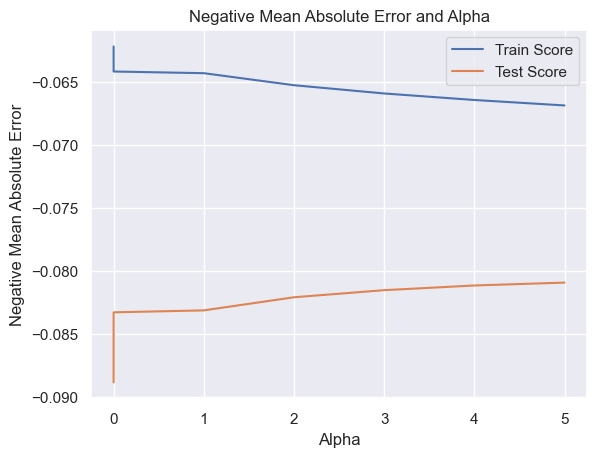

In [292]:
# plotting mean test and train scores with alpha
results['param_alpha'] = results['param_alpha'].astype('int32')

# plotting
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.show()

In [293]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.04405492e-02,  1.34671093e-02,  2.32410045e-02,  6.55973807e-02,
        4.96251177e-02,  9.91555573e-04,  2.51119459e-02,  1.34740076e-02,
        3.73011040e-02,  3.20622274e-02,  5.10490130e-02,  1.21821666e-03,
        7.18127332e-02,  1.21005062e-02,  3.19620812e-03,  8.30581583e-03,
        1.10963026e-02,  1.03840208e-02, -9.88721714e-03,  1.69629652e-02,
        1.64749604e-02,  1.28159430e-02,  1.04225376e-02,  1.44598164e-02,
        3.77603729e-03,  1.29199989e-02,  5.28636836e-03, -8.00834623e-02,
        1.24680037e-01,  1.41087106e-01,  9.06123052e-02,  5.96578975e-02,
        2.12747665e-03,  8.59700276e-03,  2.43599650e-03, -1.59976622e-02,
       -2.02653191e-02, -1.51973023e-02,  2.12430676e-02, -2.71051909e-02,
       -3.09349008e-02, -1.49963718e-02,  2.36940232e-03, -7.04626427e-02,
        8.64833216e-03, -4.95146823e-02,  1.73585816e-02, -1.42508525e-03,
       -1.11058062e-02,  1.10367140e-01, -6.45878634e-02, -1.51114454e-02,
       -9.49074657e-02, -

In [294]:
# Ridge Model Parameters
modelParameters = list(ridge.coef_)
modelParameters.insert(0, ridge.intercept_)
modelParameters = [round(x, 3) for x in modelParameters]
columns = X.columns
columns = columns.insert(0, "constant")
list(zip(columns, modelParameters))

[('constant', 11.769),
 ('MSSubClass', -0.01),
 ('LotFrontage', 0.013),
 ('LotArea', 0.023),
 ('OverallQual', 0.066),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.025),
 ('BsmtFinSF2', 0.013),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.032),
 ('2ndFlrSF', 0.051),
 ('LowQualFinSF', 0.001),
 ('GrLivArea', 0.072),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.008),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', 0.01),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', 0.017),
 ('GarageArea', 0.016),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.014),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.005),
 ('PropAge', -0.08),
 ('MSZoning_FV', 0.125),
 ('MSZoning_RH', 0.141),
 ('MSZoning_RL', 0.091),
 ('MSZoning_RM', 0.06),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', 0.009),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', -0.016),
 ('LandContour_Low', -0.02),
 ('LandContour_Lvl', -0.015),
 ('LotConfig_CulDSac', 0.021),
 ('LotConf

In [295]:
# Ridge Regression - R2 values
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# Predictions
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9355272112524963
0.9008237523486304


In [296]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12008502641294469


#### We can see that the Ridge model's performance is better than Lasso.  The train and the test scores are matching well

In [297]:
# Make a dataframe for Ridge Coefficients
modRidge = list(zip(columns, modelParameters))

paraRFE = pd.DataFrame(modRidge)
paraRFE.columns = ['Variable', 'Coeff']
paraRFE=paraRFE.sort_values(by=['Coeff'], axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                 constant  11.769
30             MSZoning_RH   0.141
29             MSZoning_FV   0.125
50    Neighborhood_Crawfor   0.110
205  SaleCondition_AdjLand   0.095
..                     ...     ...
73         Condition1_RRAe  -0.070
28                 PropAge  -0.080
83       HouseStyle_2.5Fin  -0.092
53     Neighborhood_IDOTRR  -0.095
54    Neighborhood_MeadowV  -0.113

[210 rows x 2 columns]

In [298]:
## since there are only a few coefficients at 0, we have remove them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  11.769
30             MSZoning_RH   0.141
29             MSZoning_FV   0.125
50    Neighborhood_Crawfor   0.110
205  SaleCondition_AdjLand   0.095
..                     ...     ...
73         Condition1_RRAe  -0.070
28                 PropAge  -0.080
83       HouseStyle_2.5Fin  -0.092
53     Neighborhood_IDOTRR  -0.095
54    Neighborhood_MeadowV  -0.113

[207 rows x 2 columns]

In [299]:
predRFE.shape

(207, 2)

### Observation:
#### As the model performance by Ridge was better in terms of R2 values of Train and Test, 
#### it would be better to use Ridge rather than Lasso